# Hierarchical clustering and dendrogram generation

Folliwng the tutorial: 
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

The value to replace invalid entries, like ?, nan, no attributes or '' is choosen as 0.5. This will influence the dendrogram. On the other hand, choosing 0 or 1 as replacement value is even more questionable. Another choice would be to delete the corresponding row and column.

In [3]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import numpy as np

In [4]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [5]:
from medDiaJson import *
from roman_date import from_roman

In [6]:
url = 'https://raw.githubusercontent.com/grasshoff/ComputationalHistoryScience/master/diaattr.json'
diagrams = pd.read_json(url)

In [7]:
texts = list(set(diagrams.textID))
diatypes = list(set(diagrams.diaTyp))

# Dendrogram analysis

In [8]:
# Um alle Diagramme eines Textes zu vergleichen
#Mtyp=reducedData(diagrams,[["textID",texts[1]]])

# Um alle Diagramme gleichen Types zu vergleichen:
Mtyp=reducedData(diagrams,[["diaTyp",diatypes[2]]])


merkmaleV=Mtyp[["diaID","diaAttr"]].reset_index(drop=True)
merkmaleV

frames=[]
for i in merkmaleV["diaAttr"]:
    j=pd.DataFrame(i)
    frames.append(j)
    
MerkmaleDia=pd.concat(frames,ignore_index=True)

In [10]:
rplBy = 0.5

vlList = list(pd.unique(MerkmaleDia.values.ravel()))
if '?' in vlList:
    MerkmaleDia.replace(['?'],[rplBy],inplace=True)
#if np.isnan(vlList).any():
#    MerkmaleDia.replace([np.float64(None)],[rplBy],inplace=True)
if 'no attributes' in vlList:
    MerkmaleDia.replace(['no attributes'],[rplBy],inplace=True)
if '' in vlList:
    MerkmaleDia.replace([''],[rplBy],inplace=True)

In [11]:
MerkmaleDia

,M2.1,M2.10,M2.11,M2.12,M2.13,M2.14,M2.15,M2.16,M2.17,M2.18,...,M2.21,M2.22,M2.23,M2.3,M2.4,M2.5,M2.6,M2.7,M2.8,M2.9
0,1,1,0.0,0,1,1.0,0,1.0,1,1,...,1,0,0.0,1,0,0,1.0,1,1,0
1,1,1,1.0,0,0,0.0,0,1.0,1,1,...,1,0,0.0,1,1,1,1.0,0,1,0
2,1,1,1.0,0,1,0.5,0,1.0,1,1,...,1,0,0.0,1,0,0,1.0,0,1,0
3,1,1,1.0,1,1,1.0,0,0.5,1,1,...,1,0,0.0,1,0,0,1.0,1,1,0
4,1,1,0.0,0,0,1.0,0,0.0,0,0,...,1,0,0.0,0,0,0,1.0,0,0,0
5,0,0,1.0,1,0,0.0,0,0.0,0,0,...,1,0,0.0,0,0,0,0.0,0,0,1
6,0,0,1.0,1,0,0.0,0,0.0,0,0,...,1,1,1.0,0,1,0,1.0,0,0,0
7,0,0,1.0,0,0,0.0,0,0.0,0,0,...,1,1,1.0,0,0,1,0.0,0,0,0
8,0,0,1.0,1,0,1.0,1,1.0,1,1,...,1,0,0.0,0,0,1,0.0,0,1,1
9,0,1,0.5,1,0,1.0,0,1.0,0,0,...,0,0,0.0,1,1,1,1.0,1,1,1


In [12]:
X = MerkmaleDia.values
print(X.shape)
np.unique(X)

(14, 23)


array([ 0. ,  0.5,  1. ])

Possible methods: single, complete, average, weighted,centroid,median,ward

Metric for ward,centroid and median needs to be euclidean

Possible metrics include: euclidean, minkowski, cityblock, seuclidean, sqeuclidean, cosine, correlation, hamming,jaccard,chebyshev

for full list check run  pdist?

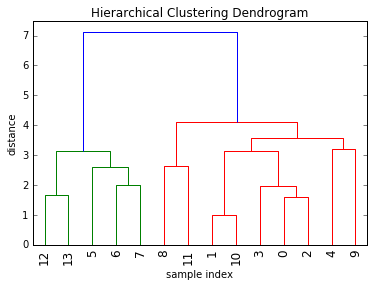

In [13]:
Z = linkage(X, method='ward')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.show()

## Weighted Euclidean distance

To introduce a non-symmetric weigth on the distance metric, one can multiply the inverse of the L2-norm of vector x :  
$dist(x,y) = \frac{1}{|x|^2}\sum\left(x-y\right)^2$ This implies that $dist(x,y) \neq dist(y,x)$ and for $|x| > |y|$, $dist(x,y)> dist(y,x)$.

In [25]:
def weightedeuclidean(u,v):
    dist = np.sqrt(1/(np.sqrt((np.sum(u**2))))*((u-v)**2).sum())
    return dist

In [26]:
xvec = np.array([1,1,1,0])
yvec = np.array([1,1,0,0])
zvec = np.array([1,1,0,1])

print('Norm of xvec is:', np.linalg.norm(xvec))

print('Norm of yvec is:', np.linalg.norm(yvec))

Norm of xvec is: 1.73205080757
Norm of yvec is: 1.41421356237


In [27]:
weightedeuclidean(xvec,yvec) == weightedeuclidean(yvec,xvec)

False

In [28]:
weightedeuclidean(xvec,yvec) < weightedeuclidean(yvec,xvec)

True

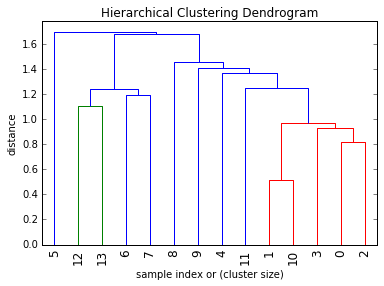

In [18]:
#X = MerkmaleDia.values
Y = pdist(X, lambda u, v: weightedeuclidean(u,v))#np.sqrt(1/(np.sqrt((np.sum(u))**2))*((u-v)**2).sum()))
#Y = pdist(X,'wminkowski',p=2,w=[1]*len(X))
Z = linkage(Y)#,method='single')
#Z = linkage(X, method='single',metric='cosine')#,metric=metric)

plt.figure()#figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.show()

### Critic:

This approach preferes diagrams with the most attributes. It is not taking care of the individual inheritance of each diagram attribute. 

To demontrate this, consider zvec = [1,1,0,1] and xvec  = [1,1,1,0], with $dist(x,z)=dist(z,x)$. But  

In [19]:
weightedeuclidean(xvec,zvec) == weightedeuclidean(zvec,xvec)

True

In [29]:
weightedattributes(np.array([0,1,0,1]),np.array([1,1,0,1])) 

1.0

In [30]:
weightedattributes(np.array([0,1,0,1]),np.array([1,1,1,0])) 

1.5811388300841898

## Including individual attribute weight



In [31]:
def weightedattributes(u,v):
    dist = np.sqrt((1/(u+1)*(u-v)**2).sum())
    return dist

xvec = np.array([1,1,1,0])

yvec = np.array([1,1,0,0])

zvec = np.array([0,0,1,1])

print('Norm of xvec is:', np.linalg.norm(xvec))

print('Norm of yvec is:', np.linalg.norm(yvec))

Norm of xvec is: 1.73205080757
Norm of yvec is: 1.41421356237


In [32]:
weightedattributes(xvec,yvec) == weightedattributes(yvec,xvec)

False

In [33]:
weightedattributes(xvec,yvec) < weightedattributes(yvec,xvec)

True

The change from xvec to yvec is a single 1->0 transition (an attribute is not copied correctly)

In [34]:
weightedattributes(np.array([1,1,1]),np.array([1,0,1]))

0.70710678118654757

In [59]:
u = np.array([1,1,1,1])
v = np.array([1,1,1,0])

d = np.sqrt((1/(2*(u+1))*(u-v)**2).sum())
d

0.5

However, the same change reversed from 0->1 has a higher weigth (it is more unlikely to invent a diagram attribute)

In [43]:
weightedattributes(np.array([1,0,1]),np.array([1,1,1]))

1.0

The change from xvec to zvec requieres three switches, 1->0,1->0 and 0-> (two attributes are lost, one new is added) and has a heigher weight

In [44]:
weightedattributes(xvec,zvec)

1.4142135623730951

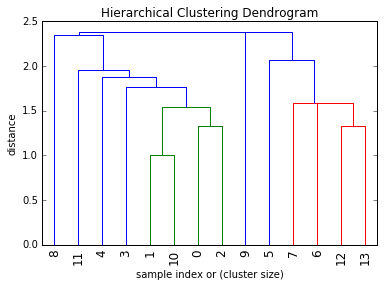

In [45]:
#X = MerkmaleDia.values
Y = pdist(X, lambda u, v: weightedattributes(u,v))#np.sqrt(1/(np.sqrt((np.sum(u))**2))*((u-v)**2).sum()))
#Y = pdist(X,'wminkowski',p=2,w=[1]*len(X))
Z = linkage(Y)#,method='single')
#Z = linkage(X, method='single',metric='cosine')#,metric=metric)

plt.figure()#figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.show()

# Comparing distance measures

To compare the three different measures of distance between diagram attributes, we plot them next to each other. 


In [68]:
%matplotlib notebook


<IPython.core.display.Javascript object>


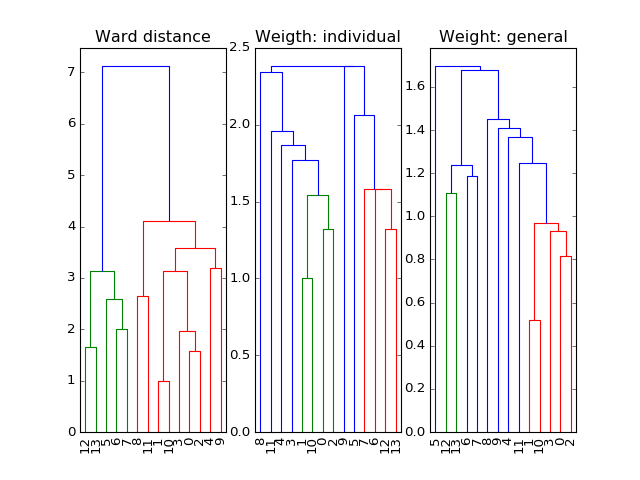

In [79]:
from collections import OrderedDict
from ipywidgets import interact

keyList = [str(x) for x in set(diagrams['diaTyp']) if x not in ['',0.0]]

dtyDict = OrderedDict([(str(x),x) for x in keyList])

def compareDistance(DiagramType):
    fig, axes =  plt.subplots(1, 3, sharex=False, sharey=False)
    fig.set_label('Hierarchical Clustering Dendrogram')

    Mtyp=reducedData(diagrams,[["diaTyp",float(DiagramType)]])

    merkmaleV=Mtyp[["diaID","diaAttr"]].reset_index(drop=True)
    merkmaleV

    frames=[]
    for i in merkmaleV["diaAttr"]:
        j=pd.DataFrame(i)
        frames.append(j)

    MerkmaleDia=pd.concat(frames,ignore_index=True)

    rplBy = 0.5

    vlList = list(pd.unique(MerkmaleDia.values.ravel()))
    if '?' in vlList:
        MerkmaleDia.replace(['?'],[rplBy],inplace=True)
    #if np.isnan(vlList).any():
    #    MerkmaleDia.replace([np.float64(None)],[rplBy],inplace=True)
    if 'no attributes' in vlList:
        MerkmaleDia.replace(['no attributes'],[rplBy],inplace=True)
    if '' in vlList:
        MerkmaleDia.replace([''],[rplBy],inplace=True)

    X = MerkmaleDia.values

    Z0 = linkage(X, method='ward')
    axes[0].set_title('Ward distance')

    Y1 = pdist(X, lambda u, v: weightedattributes(u,v))
    Z1 = linkage(Y1)
    axes[1].set_title('Weigth: individual')

    Y2 = pdist(X, lambda u, v: weightedeuclidean(u,v))
    Z2 = linkage(Y2)
    axes[2].set_title('Weight: general')

    #axes[0].xlabel('sample index')
    #plt.ylabel('distance')

    dendrogram(
        Z0,
        leaf_rotation=90.,
        leaf_font_size=12.,
        ax=axes[0]
    );

    dendrogram(
        Z1,
        leaf_rotation=90.,
        leaf_font_size=12.,
        ax=axes[1]
    );

    dendrogram(
        Z2,
        leaf_rotation=90.,
        leaf_font_size=12.,
        ax=axes[2]
    );

interact(compareDistance,DiagramType=dtyDict)

# Comparing texts with same type of diagram

## Find texts with same diagram types

First, create list of diagrams per textID. Then, sort for number of diagrams and list those with,e.g., 5 diagrams. 


In [60]:
textDiaTypList = {}
for text in texts: 
    tmp = (reducedData(diagrams,[['textID',text]])).diaTyp.tolist()
    textDiaTypList[text] = tmp

#sorted(list(textDiaTypList.values()), key=lambda x: len(x))
nbDia = 5;

for key, value in textDiaTypList.items():
    if len(list(value)) == nbDia:
        print(key, sorted(textDiaTypList[key]))

EJ(1)_A [1.0, 3.0, 5.0, 7.0, 7.0]
AP(3)_B [1.0, 2.0, 3.0, 5.0, 7.0]
FX(3)_A [11.0, 12.0, 13.0, 14.0, 15.0]
QY(1)_A [1.0, 3.0, 5.0, 6.0, 7.0]
HD(1)_A [10.0, 11.0, 12.0, 14.0, 15.0]
LS(1)_A [10.0, 11.0, 12.0, 14.0, 15.0]
FL(1)_A [10.0, 12.0, 13.0, 14.0, 14.0]
JG(1)_A [10.0, 11.0, 12.0, 14.0, 15.0]
AY(1)_C [1.0, 2.0, 3.0, 5.0, 7.0]
FX(4)_A [10.0, 12.0, 13.0, 14.0, 15.0]


Now handpick the text IDs with exactly the same diagram types.

In [61]:
#Diagrams type 2,3,4, and 6
dftext1 = reducedData(diagrams,[['textID','MP(2)_A']])
dftext2 = reducedData(diagrams,[['textID','DL(1)_A']])
dftext3 = reducedData(diagrams,[['textID','LL(1)_A']])

dfDiaTyp2346 = pd.concat([dftext1,dftext2,dftext3]).reset_index(drop=True)

In [62]:
# Diagrams of type 10,11,12,14, and 15
dftext4 = reducedData(diagrams,[['textID','JG(1)_A']])
dftext5 = reducedData(diagrams,[['textID','LS(1)_A']])
dftext6 = reducedData(diagrams,[['textID','HD(1)_A']])

dfDiaTyp1011121415 = pd.concat([dftext4,dftext5,dftext6]).reset_index(drop=True)

We can now construct the attribute dataframe in the usual manner. Note the comments on replacement of nan and other non-numerical values.

In [63]:
merkmaleV=dfDiaTyp1011121415[["diaID","diaAttr",'textID']].reset_index(drop=True)

frames=[]
for i in merkmaleV["diaAttr"]:
    j=pd.DataFrame(i).fillna(0.5) # If an attribute is encoded as nan, replace by 0.5 (= not really sure if there or not) 
    frames.append(j)
      
MerkmaleDia=pd.concat(frames,ignore_index=True).fillna(0) # Here nan corresponds to zero, since we concatenate dataframes with different diagram types,
                                                          #  i.e. a df with typ 10 has for sure no attributes of type 11. 

rplBy = 0.5 # lastly, if there are still non-numerical values, they correspond to incomplete classification like ?, we set these to 0.5,too

vlList = list(pd.unique(MerkmaleDia.values.ravel()))
print('Dataframe contains values:', vlList)

if '?' in vlList:
    MerkmaleDia.replace(['?'],[rplBy],inplace=True)
if 'no attributes' in vlList:
    MerkmaleDia.replace(['no attributes'],[rplBy],inplace=True)
if '' in vlList:
    MerkmaleDia.replace([''],[rplBy],inplace=True)

vlList2 = list(pd.unique(MerkmaleDia.values.ravel()))
print('After cleaning, dataframe contains values:',vlList2)

Dataframe contains values: [0.0, 1.0, '?']
After cleaning, dataframe contains values: [0.0, 1.0, 0.5]


In [64]:
# Augmented with marks at crossings of clusters.
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

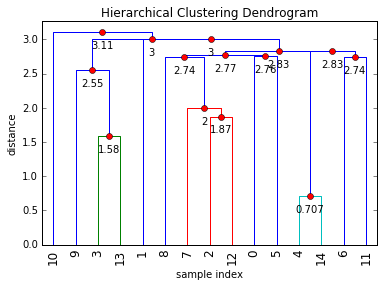

In [65]:
X = MerkmaleDia.values
Y = pdist(X, lambda u, v: weightedattributes(u,v))
Z = linkage(Y)
#Z = linkage(X, method='ward') # uncomment to see difference with above approach

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
augmented_dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.show()

# Vergleiche alle Merkmale des JSON files


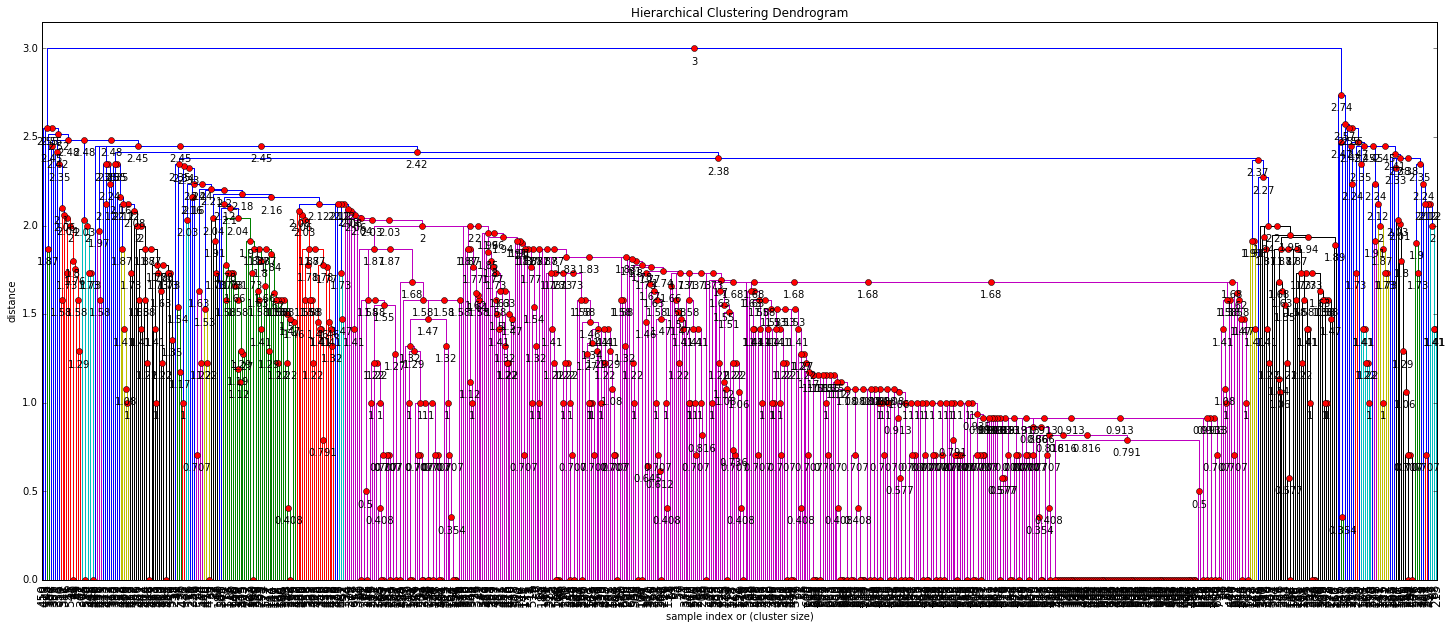

In [137]:
merkmaleV=diagrams[["diaID","diaAttr"]].reset_index(drop=True)
merkmaleV

frames=[]
for i in merkmaleV["diaAttr"]:
    j=pd.DataFrame(i)
    frames.append(j)
    
MerkmaleDia=pd.concat(frames,ignore_index=True).fillna(0.5)

rplBy = 0.5

vlList = list(pd.unique(MerkmaleDia.values.ravel()))

if '?' in vlList:
    MerkmaleDia.replace(['?'],[rplBy],inplace=True)
if 'no attributes' in vlList:
    MerkmaleDia.replace(['no attributes'],[rplBy],inplace=True)
if '' in vlList:
    MerkmaleDia.replace([''],[rplBy],inplace=True)

            
X = MerkmaleDia.values

#metric = 'euclidean'
#Z = linkage(X, method='ward',metric=metric)
#c, coph_dists = cophenet(Z, pdist(X,metric=metric))
#print(c)
Y = pdist(X, lambda u, v: weightedattributes(u,v))
#Y = pdist(X,'wminkowski',p=2,w=[1]*len(X))
Z = linkage(Y)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
augmented_dendrogram(
    Z,
    #truncate_mode='lastp',  # show only the last p merged clusters
    #p=60,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    #show_contracted=True,
)
plt.show()